# Metodología CRISP-DM

Fase de la metodología:


*   Fase I. Business Understanding. Definición de necesidades del cliente (comprensión del negocio)


*   Fase II. Data Understanding. Estudio y comprensión de los datos

* Fase III. Data Preparation. Análisis de los datos y selección de características

* Fase IV. Modeling. Modelado

* Fase V. Evaluation. Evaluación (obtención de resultados)

* Fase VI. Deployment. Despliegue (puesta en producción)

En esta ocasión, llegaremos hasta la fase V.

# Business Understanding

En esta primera etapa, Entenderemos el negocio y un resumen de los objetivos a conseguir.

Dado a que Australia se trata de un país seco, la gran cantidad de las ciudades del territorio sufren de sequía o en el mejor de los casos de precipitaciones moderadas, contando en general con inviernos ligeros y veranos cálidos, dado a estas condiciones del país se buscan maneras de aprovechar las precipitaciones por escasas que sean, por lo que se nos ha solicitado realizar un análisis de datos para realizar predicciones con la minería de datos.

Para esto se nos ha entregado un set de datos perteneciente a observaciones meteorológicas diarias de múltiples ubicaciones en Australia, obtenidas de la Oficina de Meteorología de Commonwealth en Australia y estas fueron procesadas para crear este conjunto de datos de muestra, entre los datos procesados se ha proporcionado una variable objetivo llamada RainTomorrow y esta se divide entre resultados No/Si para indicar que si habrá lluvia el día del registro adicionalmente, existe una variable de riesgo nombrada RISK_MM que indica la lluvia registrada en milímetros. Todos estos datos se encuentran en un archivo CSV que utilizaremos para extraer y desplegar dicha información en un proyecto de minería con Jupyter.

Como objetivo debemos utilizar estos datos que se nos han entregado para poder crear un modelo capaz de predecir en qué lugares de Australia habrán lluvias en los próximos días, para dar paso a esto llevaremos a cabo esta primera etapa en la que ordenaremos los datos que nos han entregado mediante la carga, integración y limpieza de estos haciéndolos más legibles para el cliente, llevando esto a cabo en las siguientes etapas que son la Comprensión de los datos y su Preparación.




# Data Understanding

En esta segunda etapa, ahondaremos más en los datos propiamente para lograr un análisis correcto.

Acciones a realizar: 

1. Análisis del Dataset Entregado
2. Carga del DataSet
3. Información preliminar de los datos
4. Dimensiones del DataSet
5. Tipos de datos del DataSet
6. Análisis por agrupaciones.
7. Análisis por estructura del dataSet.
8. Datos nulos dentro del Dataset
9. Estadísticas generales
10. Exploración de los datos de forma Gráfica.



In [ ]:
#Importamos la librería de Pandas
import pandas as pd
import datetime

In [ ]:
##Colocamos la ruta del drive en una variable para luego pasarlo a un dataframe.
url = 'https://raw.githubusercontent.com/AldoGuaschHuerta/Australia_crisp-dm/main/weatherAUS.csv'
df = pd.read_csv(url, sep=';', decimal= '.')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Dimensiones del DataSet
df.shape

(142193, 24)

In [ ]:
#Tipos de datos del DataSet
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am       object
Pressure3pm       object
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
#Información preliminar de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  object 
 16  Pressure3pm    128212 non-null  object 
 17  Cloud9am       88536 non-null

In [ ]:
#analisis por estructura del dataSet
#los 5 primeros registros se visualizan con head()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
#Los últimos 5 registros se visualizan con tail()
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [ ]:
#También se pueden ver registros aleatorios con Sample(x) donde x es la cantidad de ejemplos que queremos ver.
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
116979,2015-06-29,PerthAirport,9.9,23.5,0.0,2.0,9.1,ENE,35.0,ENE,...,28.0,1025.9,1022.8,2.0,1.0,13.4,23.1,No,0.0,No
1701,2013-11-14,Albury,8.2,21.5,0.0,NaN,NaN,SW,35.0,W,...,48.0,1016.4,1014.9,5.0,7.0,14.4,19.7,No,0.0,No
38402,2016-04-06,WaggaWagga,8.9,33.2,0.0,7.2,7.7,WSW,50.0,E,...,13.0,1014.9,1012.9,3.0,7.0,21.5,27.9,No,0.0,No
14216,2016-01-10,Moree,18.2,34.7,0.0,NaN,NaN,NE,30.0,NNE,...,26.0,1017.9,1014.8,NaN,1.0,25.3,33.5,No,0.0,No
20036,2015-11-21,NorahHead,20.1,22.0,0.0,NaN,NaN,SSW,50.0,SE,...,73.0,1015.2,1016.6,NaN,NaN,22.0,20.2,No,0.2,No
67901,2016-09-20,Melbourne,9.1,18.8,0.0,2.6,10.0,NNW,48.0,N,...,45.0,1015,1012.4,1.0,5.0,14.6,17.9,No,1.2,Yes
51991,2012-09-10,MountGinini,2.5,11.1,0.0,NaN,NaN,W,35.0,NW,...,43.0,NaN,NaN,NaN,NaN,7.2,10.2,No,0.0,No
41997,2010-09-23,Wollongong,12.7,18.8,2.6,NaN,NaN,S,41.0,S,...,76.0,1025.6,1023,8.0,8.0,15.5,15.8,Yes,0.0,No
84667,2016-12-15,Brisbane,19.0,30.6,0.0,NaN,12.9,NE,33.0,NNW,...,52.0,1013.2,1009.9,1.0,1.0,27.6,29.1,No,0.0,No
32167,2015-08-29,Sydney,9.0,20.3,0.0,4.2,10.8,WSW,30.0,W,...,31.0,1022.7,1017.9,1.0,2.0,13.0,20.1,No,0.0,No


In [ ]:
# La siguiente porción de código nos permite filtrar el data set
# Nos entrega la cantidad de nulos que tiene cada Característica y la ordena del mayor a menor.
list_nulls = df.isnull().sum()
list_nulls[(list_nulls>0)].sort_values(ascending = False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
dtype: int64

In [ ]:
#Tabla de Correlación de Pearson
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,0.517037,0.523270,-0.221467,-0.557989,0.313183


In [ ]:
#Tabla de Contigencia

#Mide la relación entre las variables Cualitativas.

data_crosstab = pd.crosstab(df.RainTomorrow,
                            df.RainToday,  
                            margins = True,
                            margins_name= 'Total',
                            normalize = True) 
print(data_crosstab)

RainToday           No       Yes     Total
RainTomorrow                              
No            0.658640  0.119741  0.778382
Yes           0.117937  0.103681  0.221618
Total         0.776577  0.223423  1.000000


In [ ]:
#con la función describe() podemos ver un resumen de las principales estadisticas
#del dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
serie_MaxTemp_Location = df.groupby('Location')['MaxTemp'].mean()
list_location = df.loc[:,"Location"].unique()

In [ ]:
df_2 = df.iloc[:,[2,3,13,14,19,20,22]]

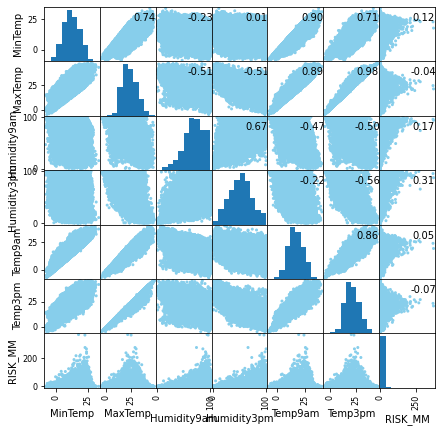

In [ ]:
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

axes = scatter_matrix(df_2, alpha=1, figsize=(7,7), color="skyblue")
corr = df_2.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

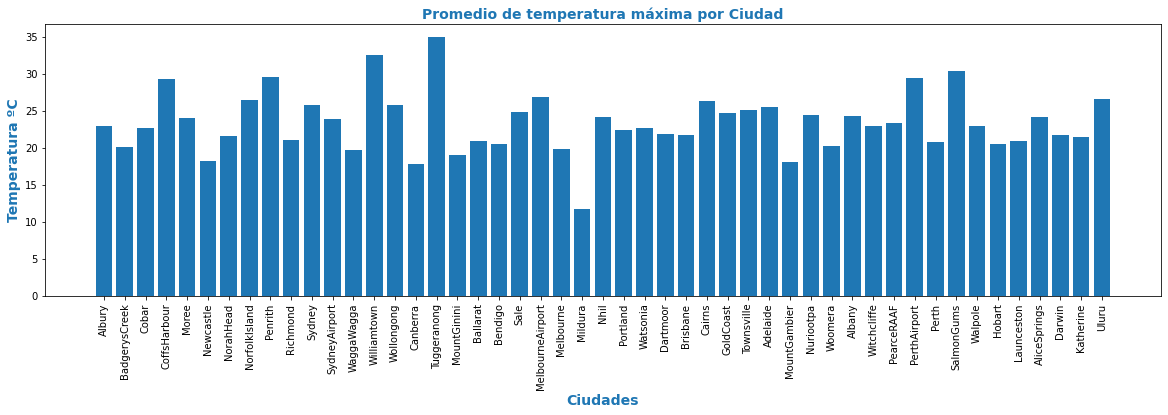

In [ ]:
 #Exploración de los datos en forma Gráfica
plt.rcParams["figure.figsize"] = (20, 5)
fig, ax = plt.subplots()
ax.bar(list_location, serie_MaxTemp_Location)
ax.set_title('Promedio de temperatura máxima por Ciudad', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Ciudades", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Temperatura ºC", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.xticks(rotation=90)
plt.show()

In [ ]:
serie_MinTemp_Location = df.groupby('Location')['MinTemp'].mean()

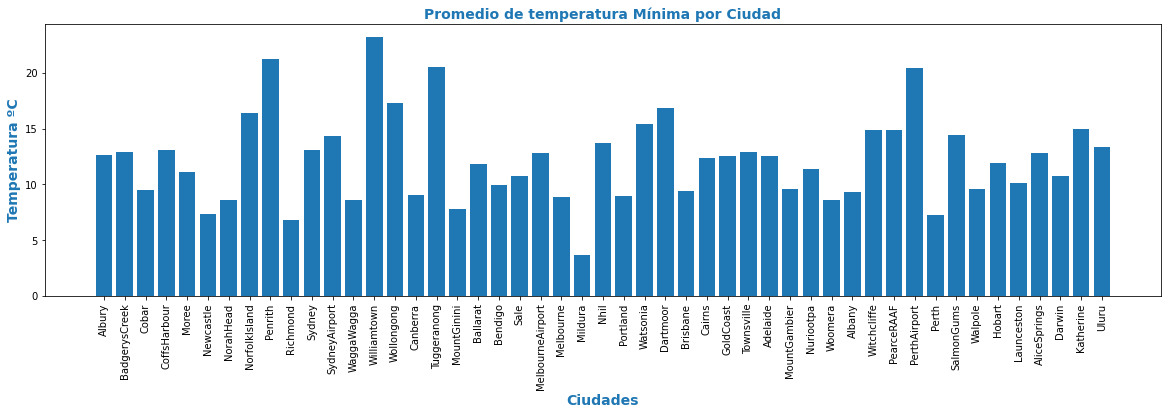

In [ ]:
plt.rcParams["figure.figsize"] = (20, 5)
fig, ax = plt.subplots()
ax.bar(list_location, serie_MinTemp_Location)
ax.set_title('Promedio de temperatura Mínima por Ciudad', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Ciudades", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Temperatura ºC", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.xticks(rotation=90)
plt.show()

In [ ]:
serie_wind_speed_Location = df.groupby('Location')['WindGustSpeed'].mean()

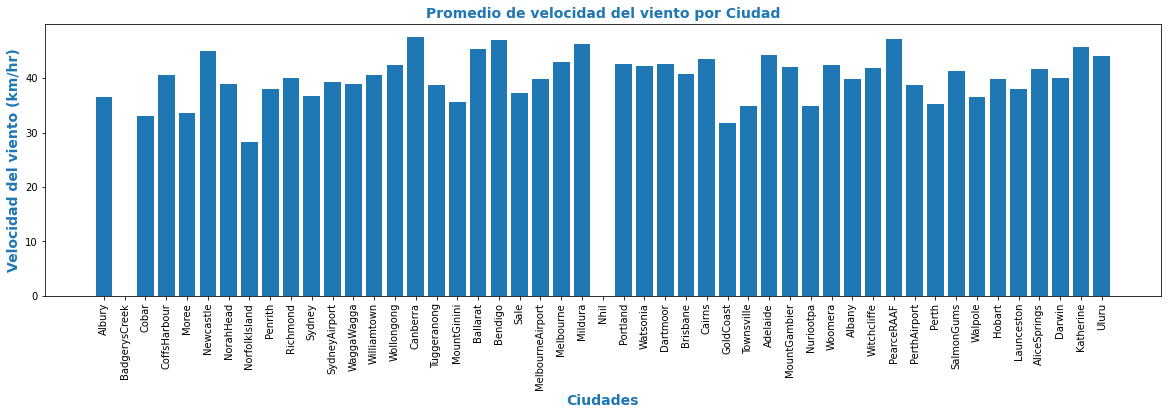

In [ ]:
plt.rcParams["figure.figsize"] = (20, 5)
fig, ax = plt.subplots()
ax.bar(list_location, serie_wind_speed_Location)
ax.set_title('Promedio de velocidad del viento por Ciudad', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Ciudades", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Velocidad del viento (km/hr)", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.xticks(rotation=90)
plt.show()

In [ ]:
serie_Location = df.groupby(by = ['Location'])['RainTomorrow'].value_counts()

In [ ]:
Arreglo = []
Arreglo = serie_Location.index
Arreglo_Value = []
Arreglo_Value = serie_Location

Arreglo_No = []
Arreglo_Yes = []

for i in Arreglo:
  if i[1] == 'No':
    Arreglo_No.append(Arreglo_Value[i])
  if i[1] == 'Yes':
    Arreglo_Yes.append(Arreglo_Value[i])

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


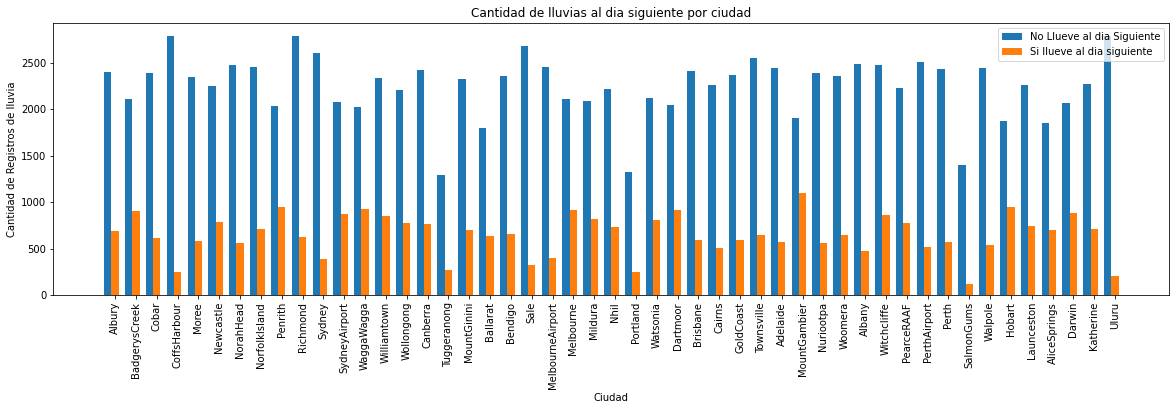

In [ ]:
serie_1 = Arreglo_No
serie_2 = Arreglo_Yes
 
plt.rcParams["figure.figsize"] = (20, 5)
numero_de_grupos = len(list_location)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
print(df['RainTomorrow'].value_counts())
plt.bar(indice_barras, serie_1, width=ancho_barras, label='No Llueve al dia Siguiente')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Si llueve al dia siguiente')
plt.legend(loc='upper right')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, list_location)
 
plt.ylabel('Cantidad de Registros de lluvia')
plt.xlabel('Ciudad')
plt.title('Cantidad de lluvias al dia siguiente por ciudad')
plt.xticks(rotation=90)
plt.show()

# Data Preparation

En esta tercera etapa, preprocesamos los datos para ser utilizados en los modelos.

Acciones a realizar: 

1.   Limpieza de valores nulos
2.   Estandarización de los Datos.

In [ ]:
# La siguiente porción de código nos permite filtrar el data set
# Nos entrega la cantidad de nulos que tiene cada Característica y la ordena del mayor a menor.
list_nulls = df.isnull().sum()
list_nulls[(list_nulls>0)].sort_values(ascending = False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
dtype: int64

In [ ]:
means = round(df.groupby('Location').transform(np.mean),2)
df = df.fillna(means)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  """Entry point for launching an IPython kernel.


In [ ]:
list_nulls = df.isnull().sum()
list_nulls[(list_nulls>0)].sort_values(ascending = False)

Sunshine         52071
Evaporation      44261
Cloud9am         34034
Cloud3pm         34034
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     5971
WindDir3pm        3778
RainToday         1406
dtype: int64

In [ ]:
del df['Sunshine']
del df['Evaporation']

In [ ]:
df = df.dropna(subset = ['RainToday'])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df.fillna(df.mean(), inplace=True)
df = df.dropna(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
list_nulls = df.isnull().sum()
list_nulls[(list_nulls>0)].sort_values(ascending = False)

Series([], dtype: int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 142192
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    140787 non-null  object 
 6   WindGustSpeed  140787 non-null  float64
 7   WindDir9am     140787 non-null  object 
 8   WindDir3pm     140787 non-null  object 
 9   WindSpeed9am   140787 non-null  float64
 10  WindSpeed3pm   140787 non-null  float64
 11  Humidity9am    140787 non-null  float64
 12  Humidity3pm    140787 non-null  float64
 13  Cloud9am       140787 non-null  float64
 14  Cloud3pm       140787 non-null  float64
 15  Temp9am        140787 non-null  float64
 16  Temp3pm        140787 non-null  float64
 17  RainToday      140787 non-nul

En este punto, Exportaremos los datos para ser usados en Power Bi antes de Estandarizar.

In [ ]:
df.to_csv('australia.csv', sep=';')

In [ ]:
del df['Date']

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import BinaryEncoder

target_risk = df['MaxTemp']
target_Tomorrow = df['RainTomorrow'].replace({'No': 0, 'Yes':1})


df = df.drop(['MaxTemp', 'RainTomorrow'], axis = 1)



columnas_numeric = df.select_dtypes(include=['float64']).columns.to_list()
columna_binary = []
columna_binary.append(df.columns.values[0])
columna_binary.append(df.columns.values[3])
columna_binary.append(df.columns.values[5])
columna_binary.append(df.columns.values[6])

columna_onehot = []
columna_onehot.append(df.columns.values[15])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), columnas_numeric),
                    ('onehot', OneHotEncoder(), columna_onehot),
                    ('binary', BinaryEncoder(), columna_binary)],
                remainder='passthrough')

In [ ]:
df1 = preprocessor.fit_transform(df)

In [ ]:
decodificar_nombre = preprocessor.named_transformers_['onehot'].get_feature_names(columna_onehot)
nombre_columnas = np.concatenate([columnas_numeric, decodificar_nombre, preprocessor.named_transformers_["binary"].get_feature_names()])
Datos_train_prep = preprocessor.transform(df)
df = pd.DataFrame(Datos_train_prep, columns=nombre_columnas)
df.info()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        140787 non-null  float64
 1   Rainfall       140787 non-null  float64
 2   WindGustSpeed  140787 non-null  float64
 3   WindSpeed9am   140787 non-null  float64
 4   WindSpeed3pm   140787 non-null  float64
 5   Humidity9am    140787 non-null  float64
 6   Humidity3pm    140787 non-null  float64
 7   Cloud9am       140787 non-null  float64
 8   Cloud3pm       140787 non-null  float64
 9   Temp9am        140787 non-null  float64
 10  Temp3pm        140787 non-null  float64
 11  RISK_MM        140787 non-null  float64
 12  RainToday_No   140787 non-null  float64
 13  RainToday_Yes  140787 non-null  float64
 14  Location_0     140787 non-null  float64
 15  Location_1     140787 non-null  float64
 16  Location_2     140787 non-null  float64
 17  Location_3     140787 non-nul

# Modelling

En esta fase, se seleccionan y aplican las técnicas de modelado que sean pertinentes al problema (cuantas más mejor), y se calibran sus parámetros a valores óptimos. Típicamente hay varias técnicas para el mismo tipo de problema de minería de datos. 

In [ ]:
#Importaciones

from sklearn.model_selection import train_test_split

#modelos de Clasificación
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Metricas para Clasificación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#Modelos de Regresión
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
#Metricas para la regresión
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

import seaborn as sns
features = df

In [ ]:
LABELS = ["0","1"]
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

Realizamos Separación del DataFrame en Train y Test con El Target que utilizaremos en Clasificación y veremos las metricas que nos entregan los modelos.

Modelos a utilizar: RandomForestClassifier(), SVC(), K-Neighbors()

Target: RainTomorrow

  MODELOS DE CLASIFICACIÓN

In [ ]:
#Split para el target RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(
                                        df,
                                        target_Tomorrow,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
#modelo RandomForestClassifier
ModeloRandomForest = RandomForestClassifier(n_estimators = 1000)
ModeloRandomForest.fit(X_train,y_train)
print(ModeloRandomForest.score(X_test,y_test))

0.8535762483130904


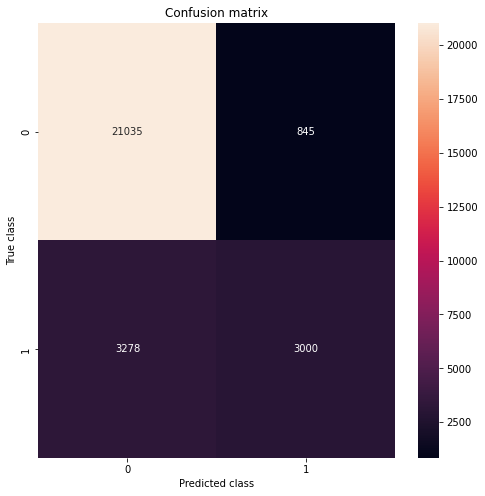

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21880
           1       0.78      0.48      0.59      6278

    accuracy                           0.85     28158
   macro avg       0.82      0.72      0.75     28158
weighted avg       0.85      0.85      0.84     28158



In [ ]:
pred_y_Random = ModeloRandomForest.predict(X_test)
mostrar_resultados(y_test, pred_y_Random)

In [ ]:
roc_score_random = roc_auc_score(y_test,pred_y_Random)
print(roc_score_random)

0.7196197233833014


In [ ]:
#modelo KNeighborsClassifier
ModeloKNeighbors = KNeighborsClassifier()
ModeloKNeighbors.fit(X_train,y_train)
print(ModeloKNeighbors.score(X_test,y_test))

0.8340436110519213


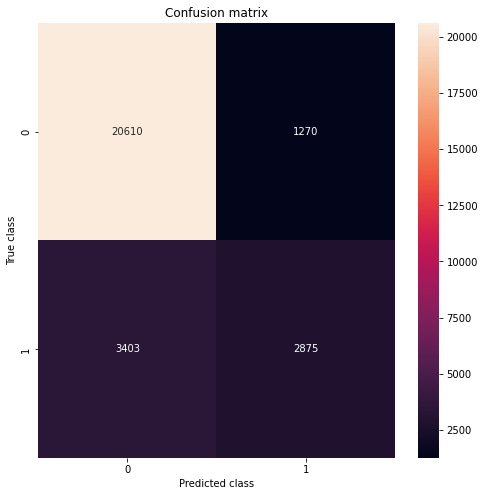

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     21880
           1       0.69      0.46      0.55      6278

    accuracy                           0.83     28158
   macro avg       0.78      0.70      0.72     28158
weighted avg       0.82      0.83      0.82     28158



In [ ]:
pred_y_kneighbors = ModeloKNeighbors.predict(X_test)
mostrar_resultados(y_test, pred_y_kneighbors)

In [ ]:
roc_score_kneighbors = roc_auc_score(y_test,pred_y_kneighbors)
print(roc_score_kneighbors)

0.6999522577609167


In [ ]:
#modelo SVC rbf
ModeloSVCrbf = SVC(kernel='rbf', C=1, class_weight="balanced")
ModeloSVCrbf.fit(X_train,y_train)
print(ModeloSVCrbf.score(X_test,y_test))

0.8100007102777186


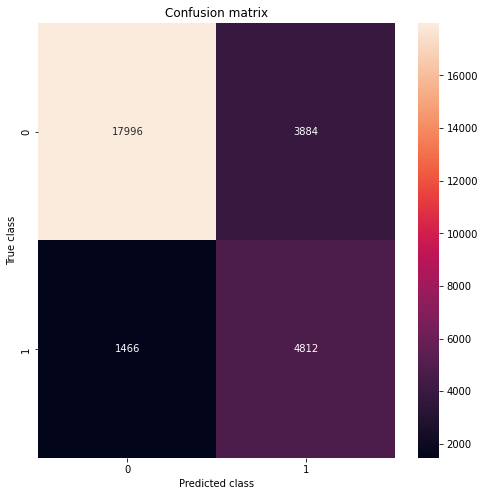

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     21880
           1       0.55      0.77      0.64      6278

    accuracy                           0.81     28158
   macro avg       0.74      0.79      0.76     28158
weighted avg       0.84      0.81      0.82     28158



In [ ]:
pred_y_SVCrbf = ModeloSVCrbf.predict(X_test)
mostrar_resultados(y_test, pred_y_SVCrbf)

MODELOS DE REGRESIÓN

In [ ]:
def metricas_regresion(y_test, y_tongo):
  print("Error medio cuadrado         :", mean_squared_error(y_test, y_tongo))
  print("Raiz de Error medio cuadrado :", sqrt(mean_squared_error(y_test, y_tongo)))
  print("R² Cuadrado                  :", r2_score(y_test, y_tongo))
  print("Error Medio Absoluto         :", mean_absolute_error(y_test, y_tongo))
  

In [ ]:
df = df[['MinTemp','Temp9am', 'Temp3pm']]

#Split para el target RISK_MM

X_train, X_test, y_train, y_test = train_test_split(
                                        df,
                                        target_risk,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
modelo_linear_regressor = LinearRegression()
modelo_linear_regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_tongo_linear_regressor = modelo_linear_regressor.predict(X_test)
metricas_regresion(y_test,y_tongo_linear_regressor) 

Error medio cuadrado         : 1.516835631453535
Raiz de Error medio cuadrado : 1.2315988110799454
R² Cuadrado                  : 0.9700369750781845
Error Medio Absoluto         : 0.8229113875870372


In [ ]:
modelo_random_forest_regressor = RandomForestRegressor()
modelo_random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_tongo_RandomForestRegressor = modelo_random_forest_regressor.predict(X_test)
metricas_regresion(y_test,y_tongo_RandomForestRegressor) 

Error medio cuadrado         : 1.2342586182830861
Raiz de Error medio cuadrado : 1.1109719250652044
R² Cuadrado                  : 0.9756188996535222
Error Medio Absoluto         : 0.7648325423742137


In [ ]:
modelo_GradientBoostingRegressor = GradientBoostingRegressor()
modelo_GradientBoostingRegressor.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_tongo_GradientBoostingRegressor = modelo_GradientBoostingRegressor.predict(X_test)
metricas_regresion(y_test,y_tongo_GradientBoostingRegressor) 

Error medio cuadrado         : 1.2069403818962319
Raiz de Error medio cuadrado : 1.0986083842280796
R² Cuadrado                  : 0.9761585342590826
Error Medio Absoluto         : 0.732093770829632


In [ ]:
modelo_SVR = SVR()
modelo_SVR.fit(X_train,y_train)

SVR()

In [ ]:
y_tongo_SVR = modelo_SVR.predict(X_test)
metricas_regresion(y_test,y_tongo_SVR) 

Error medio cuadrado         : 1.244504896679347
Raiz de Error medio cuadrado : 1.11557379705663
R² Cuadrado                  : 0.9754164983592905
Error Medio Absoluto         : 0.7024778191747797


In [ ]:
modelo_kneighbors_regressor = KNeighborsRegressor()
modelo_kneighbors_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
y_tongo_KNeighborsRegressor = modelo_kneighbors_regressor.predict(X_test)
metricas_regresion(y_test,y_tongo_KNeighborsRegressor) 

Error medio cuadrado         : 1.3336338593650117
Raiz de Error medio cuadrado : 1.154830662636307
R² Cuadrado                  : 0.9736558769215893
Error Medio Absoluto         : 0.7832885148092904
